##6


In [ ]:
%pip install gurobipy
import gurobipy as grb
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def kpi_simple(df):
    SSE =(df['Error']**2).sum()
    MSE =(df['Error']**2).mean()
    print('SSE: {:0.2f}'.format(SSE))
    print('MSE: {:0.2f}'.format(MSE))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df6 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Duque.csv")
# Dataset is now stored in a Pandas Dataframe
df6.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Obs,Day,Temp,Demand
0,1,1,92,57.7
1,2,2,96,71.5
2,3,3,96,73.0
3,4,4,89,68.6
4,5,5,95,71.2


#6-(a) Regression

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Duque.csv")
# Dataset is now stored in a Pandas Dataframe
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Obs,Day,Temp,Demand
0,1,1,92,57.7
1,2,2,96,71.5
2,3,3,96,73.0
3,4,4,89,68.6
4,5,5,95,71.2


In [ ]:
import statsmodels.api as sm

indep=df[['Temp']]
indep = sm.add_constant(indep) #include constant
#print(indep)
model = sm.OLS(df[['Demand']],indep) #model(y,x)
results = model.fit()
print(results.summary())

print("Parameters: ", results.params)
print("Standard errors: ", results.bse) #var std

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.376
Date:                Fri, 03 Jun 2022   Prob (F-statistic):              0.251
Time:                        13:13:20   Log-Likelihood:                -86.635
No. Observations:                  28   AIC:                             177.3
Df Residuals:                      26   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2124     29.259      1.067      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df['Prediction2']=results.predict(indep)
df['Error2']=results.resid
print(df)

    Obs  Day  Temp  Demand  Prediction2     Error2
0     1    1    92    57.7    64.848356  -7.148356
1     2    2    96    71.5    66.310790   5.189210
2     3    3    96    73.0    66.310790   6.689210
3     4    4    89    68.6    63.751531   4.848469
4     5    5    95    71.2    65.945181   5.254819
5     6    6    94    67.2    65.579573   1.620427
6     7    7    99    62.7    67.407615  -4.707615
7     8    1    96    64.6    66.310790  -1.710790
8     9    2    96    68.5    66.310790   2.189210
9    10    3    91    68.8    64.482748   4.317252
10   11    4    93    65.8    65.213965   0.586035
11   12    5    88    61.5    63.385922  -1.885922
12   13    6    90    57.6    64.117139  -6.517139
13   14    7    92    54.2    64.848356 -10.648356
14   15    1    98    61.1    67.042007  -5.942007
15   16    2    94    64.5    65.579573  -1.079573
16   17    3    99    68.6    67.407615   1.192385
17   18    4    94    67.1    65.579573   1.520427
18   19    5    98    76.2    6

## Therefore, the estimated regression equation should be:
## Demand = 31.2124 + 0.3656*Temp

# 6-(b) Multiple Regression

In [ ]:
#daily dummies
#drop the first column of the resulting df (since n-1 dummy vars suffice)

trendIndep = df['Temp']
trendIndep = sm.add_constant(trendIndep)

dummy = pd.get_dummies(df['Day'],drop_first = True)
# print(dummy)
trendIndep2=pd.concat([trendIndep, dummy], axis = 1)
# print(trendIndep2)

model_daily = sm.OLS(df[['Demand']],trendIndep2) #model(y,x)
results_daily = model_daily.fit()
print(results_daily.summary())
results_daily.params

    2  3  4  5  6  7
0   0  0  0  0  0  0
1   1  0  0  0  0  0
2   0  1  0  0  0  0
3   0  0  1  0  0  0
4   0  0  0  1  0  0
5   0  0  0  0  1  0
6   0  0  0  0  0  1
7   0  0  0  0  0  0
8   1  0  0  0  0  0
9   0  1  0  0  0  0
10  0  0  1  0  0  0
11  0  0  0  1  0  0
12  0  0  0  0  1  0
13  0  0  0  0  0  1
14  0  0  0  0  0  0
15  1  0  0  0  0  0
16  0  1  0  0  0  0
17  0  0  1  0  0  0
18  0  0  0  1  0  0
19  0  0  0  0  1  0
20  0  0  0  0  0  1
21  0  0  0  0  0  0
22  1  0  0  0  0  0
23  0  1  0  0  0  0
24  0  0  1  0  0  0
25  0  0  0  1  0  0
26  0  0  0  0  1  0
27  0  0  0  0  0  1
    const  Temp  2  3  4  5  6  7
0     1.0    92  0  0  0  0  0  0
1     1.0    96  1  0  0  0  0  0
2     1.0    96  0  1  0  0  0  0
3     1.0    89  0  0  1  0  0  0
4     1.0    95  0  0  0  1  0  0
5     1.0    94  0  0  0  0  1  0
6     1.0    99  0  0  0  0  0  1
7     1.0    96  0  0  0  0  0  0
8     1.0    96  1  0  0  0  0  0
9     1.0    91  0  1  0  0  0  0
10    1.0    93  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    -6.598928
Temp      0.706673
2         8.368327
3        10.023332
4         8.453337
5        10.626668
6         5.960010
7        -2.746687
dtype: float64

## Therefore, the estimated regression model should be:
## Demand = -6.5989 + 0.7067 * Temp + 8.3683 * Day2 + 10.0233 * Day3 + 8.4533 * Day4 + 10.6267 * Day5 + 5.9600 * Day6 + -2.7467 * Day7

## The $R^2$ = 0.775, meaning that 77.5% of variation of Demand is reduced by introducing Temp, Day2-7 variables in the model

# 6-(c)

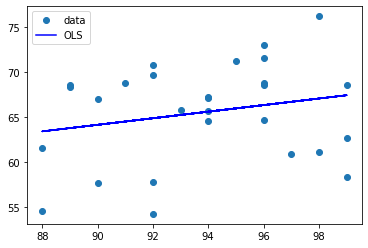

In [ ]:
import matplotlib.pyplot as plt
#plot x-y linearity: actual vs. fitted (simple regression only)
plt.plot(df['Temp'], df['Demand'], "o", label="data")
plt.plot(df['Temp'], df['Prediction2'], "b-", label="OLS") #blue color & solid line
plt.legend(loc="best")
plt.show()

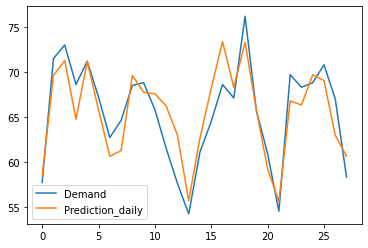

In [ ]:
df['Prediction_daily']=results_daily.predict(trendIndep2)
df[['Demand','Prediction_daily']].plot()

## Conclusion:
## 我們認為multiple regression會比較好，這題的數據非常分散，使用simple regression雖然會得到較容易理解的線性回歸，但卻忽略了每一筆資料的差異性，故我們認為使用miultiple regression會有較精準的結果

In [ ]:
newtemp = pd.DataFrame([1.0, 94], index=["const","temp"])
newtemp = newtemp.T
newtemp = sm.add_constant(newtemp)
# print(newtemp)
newday = pd.DataFrame([0,1,0,0,0,0], index =['2','3','4','5','6','7'])
newday = newday.T
print(newday)
newx=pd.concat([newtemp, newday], axis = 1)
print(newx)
results_daily.predict(newx)


# dummy = pd.get_dummies(df['Day'],drop_first = True)
# # print(dummy)
# trendIndep2=pd.concat([trendIndep, dummy], axis = 1)
# print(trendIndep2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    69.851668
dtype: float64